<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/Mini_Food_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2025-09-28 06:15:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   136MB/s    in 15s     

2025-09-28 06:15:23 (105 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [2]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-09-28 06:15:23--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-09-28 06:15:23 (116 MB/s) - ‘helper_functions.py’ saved [6733/6733]



In [3]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys,walk_through_dir,unzip_data

In [4]:
unzip_data('101_food_classes_10_percent.zip')

In [5]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/spaghetti_carbonara'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/breakfast_burrito'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/french_fries'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/club_sandwich'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chocolate_cake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ravioli'.
There are 0 directories and 75 images 

In [6]:
train_dir='101_food_classes_10_percent/train'
test_dir='101_food_classes_10_percent/test'

In [7]:
import tensorflow as tf

In [8]:
IMG_SIZE=(224,224)

In [9]:
train_all_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',image_size=IMG_SIZE)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


Create a model checkpoint callback

In [11]:
chechpoint_path='101_food_all_data_10%_checkpoint.weights.h5'
check_point_callback=tf.keras.callbacks.ModelCheckpoint(chechpoint_path,save_weights_only=True,monitor='val_accuracy',save_best_only=True)

# **Create Data Augmentation Layer**

In [13]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing

In [14]:
data_augmentation=Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomRotation(0.2),
    # layers.Rescaling(1/255.)
],name='data_augmentation_layer')

In [15]:
# Setup base model
base_model=tf.keras.applications.EfficientNetB0(include_top=False,weights='imagenet')
base_model.trainable=False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
# Setup model architecture with trainable top layer
inputs=layers.Input(shape=(224,224,3),name='input_layer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D(name='Global_Average_pooling_layer')(x)
outputs=layers.Dense(len(train_all_10_percent.class_names),activation='softmax',name='Output_layer')(x)

model=tf.keras.Model(inputs,outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_layer         │ (None, None, None, 3)  │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Global_Average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [18]:
# Compile and fit
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Model Training

In [19]:
history_all_classes_10_percent=model.fit(train_all_10_percent,epochs=5,validation_data=test_data,validation_steps=int(0.15*len(test_data)),callbacks=[check_point_callback])

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 55s 173ms/step - accuracy: 0.1710 - loss: 3.8958 - val_accuracy: 0.4820 - val_loss: 2.2649
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 38s 156ms/step - accuracy: 0.4966 - loss: 2.2441 - val_accuracy: 0.5514 - val_loss: 1.8418
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 36s 152ms/step - accuracy: 0.5673 - loss: 1.8298 - val_accuracy: 0.5697 - val_loss: 1.6881
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.6113 - loss: 1.5995 - val_accuracy: 0.5850 - val_loss: 1.6069
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 36s 152ms/step - accuracy: 0.6371 - loss: 1.4586 - val_accuracy: 0.5861 - val_loss: 1.5650


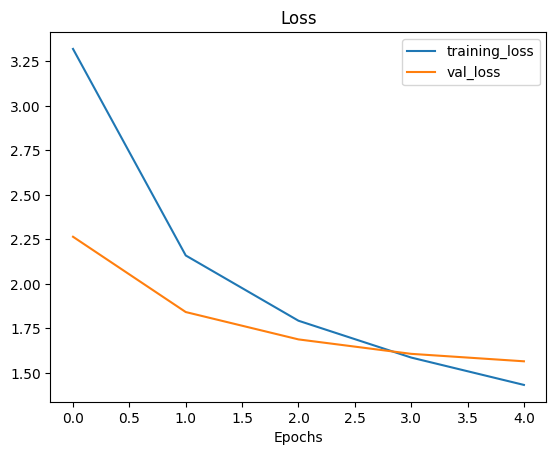

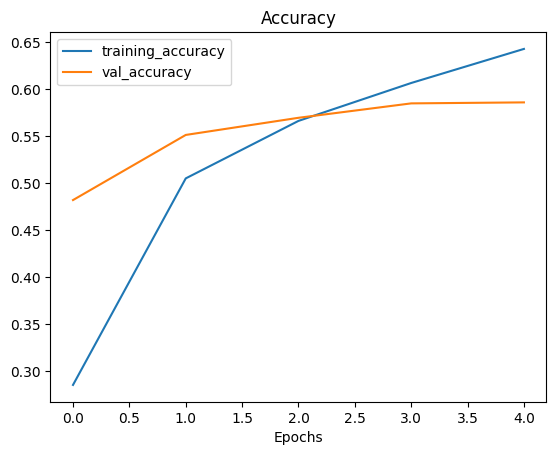

In [20]:
plot_loss_curves(history_all_classes_10_percent)

In [22]:
# Unfreeze some layers for fine tunning the
base_model.trainable=True

for layer  in base_model.layers[:-5]:
  layer.trainable=False

In [27]:
# Check which layer in model are trainable
for layer_no ,layer in enumerate(model.layers[2].layers):
  print(layer_no,layer.name,layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [28]:
for layer in model.layers:
  print(layer.name,layer.trainable)

input_layer True
data_augmentation_layer True
efficientnetb0 True
Global_Average_pooling_layer True
Output_layer True


In [31]:
# Recompile the model

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# Model Training
fine_tune_epochs=10

history_all_classes_10_percent_fine_tuned=model.fit(train_all_10_percent,
                                                    epochs=fine_tune_epochs,
                                                    initial_epoch=history_all_classes_10_percent.epoch[-1],
                                                    validation_data=test_data,
                                                    validation_steps=int(0.15*len(test_data)))

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 50s 162ms/step - accuracy: 0.6066 - loss: 1.4792 - val_accuracy: 0.5959 - val_loss: 1.5272
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 35s 148ms/step - accuracy: 0.7032 - loss: 1.1089 - val_accuracy: 0.6012 - val_loss: 1.5304
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.7629 - loss: 0.8799 - val_accuracy: 0.5871 - val_loss: 1.5889
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 34s 145ms/step - accuracy: 0.8122 - loss: 0.7112 - val_accuracy: 0.6043 - val_loss: 1.5543
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 34s 145ms/step - accuracy: 0.8408 - loss: 0.6021 - val_accuracy: 0.5998 - val_loss: 1.5665
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 82s 320ms/step - accuracy: 0.8669 - loss: 0.5265 - val_accuracy: 0.5985 - val_loss: 1.6058


In [32]:
all_classes_10_percent_fine_tune_result=model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6072 - loss: 1.5740
